# Imports

In [9]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [10]:
n = 6 # 5~9
label_name = "stat2" # update stat number
layers = [2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs =  2000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.001 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [11]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [12]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.36897748708725
Epoch 1, Loss 6.326944530010223
Epoch 2, Loss 6.267974019050598
Epoch 3, Loss 6.20273494720459
Epoch 4, Loss 6.136488258838654
Epoch 5, Loss 6.070627510547638
Epoch 6, Loss 6.007214844226837
Epoch 7, Loss 5.943137049674988
Epoch 8, Loss 5.88070023059845
Epoch 9, Loss 5.821386873722076
Epoch 10, Loss 5.761658310890198
Epoch 11, Loss 5.70402055978775
Epoch 12, Loss 5.647519528865814
Epoch 13, Loss 5.5924540758132935
Epoch 14, Loss 5.536979138851166
Epoch 15, Loss 5.483845293521881
Epoch 16, Loss 5.431387305259705
Epoch 17, Loss 5.379910886287689
Epoch 18, Loss 5.328960657119751
Epoch 19, Loss 5.280220925807953
Epoch 20, Loss 5.231034100055695
Epoch 21, Loss 5.183835864067078
Epoch 22, Loss 5.137123703956604
Epoch 23, Loss 5.090880572795868
Epoch 24, Loss 5.046011865139008
Epoch 25, Loss 5.001381814479828
Epoch 26, Loss 4.957660555839539
Epoch 27, Loss 4.91478830575943
Epoch 28, Loss 4.872813880443573
Epoch 29, Loss 4.83152711391449
Epoch 30, Loss 4.79123562

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_37928\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


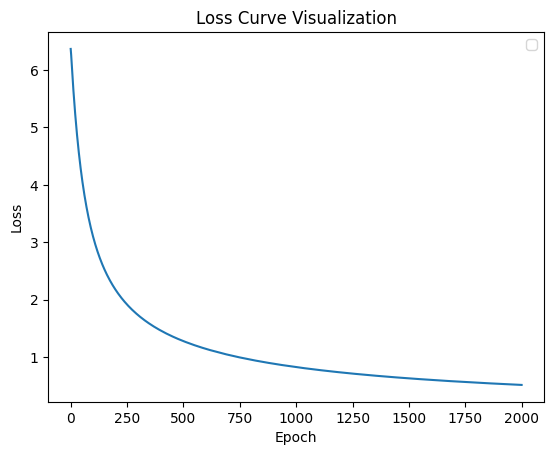

In [13]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[78, 0], [0, 66]]


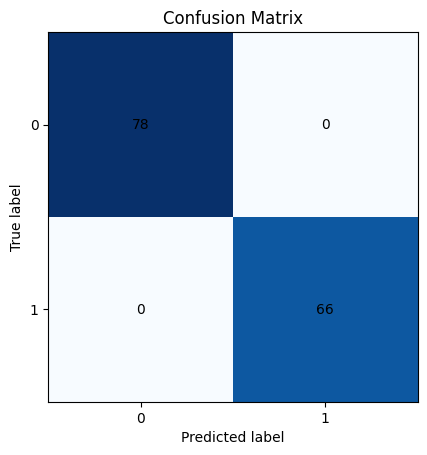

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [14]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

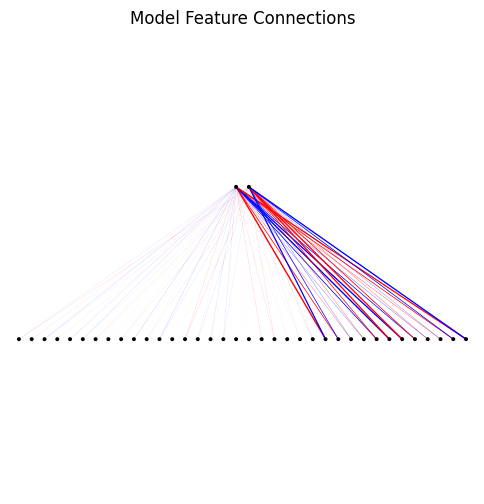

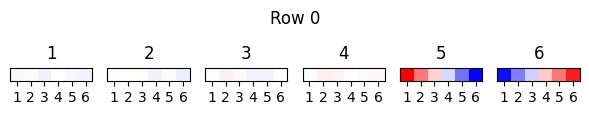

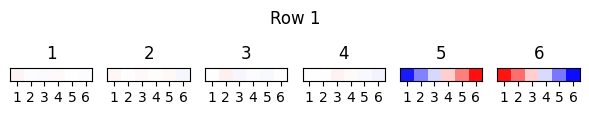

'\nmodel.plot_heatmap_feature(0, 0)\nmodel.plot_heatmap_feature(0, 1)\nmodel.plot_heatmap_feature(0, 2)\nmodel.plot_heatmap_feature(0, 3)\nmodel.plot_heatmap_feature(0, 4)\n'

In [15]:
model.plot_connections()

model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)

"""
model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0, 2)
model.plot_heatmap_feature(0, 3)
model.plot_heatmap_feature(0, 4)
"""